In [47]:
import pandas as pd
import numpy as np
import os

# visualize
import seaborn as sns
import matplotlib.pyplot as plt

# acquire
from env import host, user, password
from pydataset import data
import acquire
import prepare
from scipy import stats
from sklearn.model_selection import train_test_split


In [2]:
# use a python module (pydata or seaborn datasets) containing datasets as a 
# source from the iris data. Create a pandas dataframe, df_iris, from this data.
df_iris = data('iris')

In [3]:
# print the first 3 rows
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [4]:
# print the number of rows and columns
df_iris.shape

(150, 5)

In [5]:
# print the column names
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [6]:
# print the data type of each column
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [7]:
# print the summary statistics for each of the numeric variables. Would 
# you recommend rescaling the data based on these statistics
df_iris.describe()   # .T can be used to transpose columns and rows

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

In [8]:
df_excel = pd.read_excel('Excel_Exercises.xlsx', sheet_name='Table1_CustDetails')

In [9]:
df_excel.head(3)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,phone_type,internet_service,internet_type,contract_type,...,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,Start_Date,average_monthly_charges,Match,service_type
0,0002-ORFBO,Female,0,Yes,Yes,1,One Line,1,DSL,1,...,True,False,True,True,True,3,2020-08-13,65.9222,No Match,Phone + Internet
1,0003-MKNFE,Male,0,No,No,2,Two or More Lines,1,DSL,0,...,False,False,True,True,True,0,2020-08-13,60.2667,No Match,Phone + Internet
2,0004-TLHLJ,Male,0,No,No,1,One Line,2,Fiber Optic,0,...,False,True,True,True,True,0,2021-01-13,70.2125,No Match,Phone + Internet


In [10]:
# assign the first 100 rows to a new dataframe, df_excel_sample

df_excel_sample = df_excel.head(100)

In [11]:
df_excel_sample.shape

(100, 26)

In [12]:
# print the number of rows of your original dataframe

df_excel.shape[0]

7049

In [13]:
# print the first 5 column names

df_excel.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

In [14]:
# print the column names that have a data type of object

list(df_excel.select_dtypes(['object']).columns)

['customer_id',
 'gender',
 'partner',
 'dependents',
 'phone_type',
 'internet_type',
 'contract_length',
 'payment_type',
 'churn',
 'average_monthly_charges',
 'Match',
 'service_type']

In [15]:
df_excel.describe()

,is_senior_citizen,phone_service,internet_service,contract_type,monthly_charges,total_charges,Tenure,partner_dependents
count,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7038.000000,7049.000000,7049.000000
mean,0.162009,1.324585,1.222585,0.690878,64.747014,2283.043883,32.374805,1.083416
std,0.368485,0.642709,0.779068,0.833757,30.099460,2266.521984,24.596637,1.226883
min,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,35.450000,401.587500,9.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,70.350000,1397.100000,29.000000,1.000000
75%,0.000000,2.000000,2.000000,1.000000,89.850000,3793.775000,55.000000,2.000000
max,1.000000,2.000000,2.000000,2.000000,118.750000,8684.800000,79.000000,3.000000


In [16]:
# compute the range for each of the numeric variables.

df_excel.select_dtypes(['int64', 'float64']).max() - df_excel.select_dtypes(['int64', 'float64']).min()

is_senior_citizen        1.0
phone_service            2.0
internet_service         2.0
contract_type            2.0
monthly_charges        100.5
total_charges         8666.0
Tenure                  79.0
partner_dependents       3.0
dtype: float64

### 3. Read the data from this google sheet into a dataframe, df_google

In [17]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_googlesheet = pd.read_csv(csv_export_url)

In [18]:
# print the first 3 rows

df_googlesheet.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [19]:
# print the number of rows and columns

df_googlesheet.shape

(891, 12)

In [20]:
# print the column names

df_googlesheet.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [21]:
df_googlesheet.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [22]:
# print the summary statistics for each of the numeric variables

df_googlesheet.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                    Name     Sex   Age  SibSp  \
0                                Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1   
2                                 Heikkinen, Miss. Laina  female  26.0      0   
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                               Allen, Mr. William Henry    male  35.0      0   
..                     

In [23]:
# print the unique values for each of your categorical variables

df_googlesheet.select_dtypes('object').nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [24]:
df_googlesheet.Survived.value_counts(dropna=False)

0    549
1    342
Name: Survived, dtype: int64

In [25]:
df_googlesheet.Pclass.value_counts(dropna=False)


3    491
1    216
2    184
Name: Pclass, dtype: int64

In [26]:
df_googlesheet.Sex.value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

In [27]:
df_googlesheet.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

#### 3. Once you've got your get_titanic_data and get_iris_data functions written, now it's time to add caching to them. To do this, edit the beginning of the function to check for a local filename like titanic.csv or iris.csv. If they exist, use the .csv file. If the file doesn't exist, then produce the SQL and pandas necessary to create a dataframe, then write the dataframe to a .csv file with the appropriate name.¶

In [28]:
from acquire import get_connection, new_titanic_data, get_titanic_data, new_iris_data, get_iris_data

In [29]:
df = get_titanic_data()
df.head(2)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0


In [30]:
df = get_titanic_data(cached=True)
df.head(2)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0


In [31]:
df = get_iris_data()
df.head(2)

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa


### Data Preparation Exercises

#### The end product of this exercise should be the specified functions in a python script named prepare.py. Do these in your classification_exercises.ipynb first, then transfer to the prepare.py file.

#### This work should all be saved in your local classification-exercises repo. Then add, commit, and push your changes.

#### 1. Use the function defined in acquire.py to load the iris data.

In [32]:
df.head(2)

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa


#### 2. Drop the species_id and measurement_id columns.

In [33]:
df = df.drop(columns=['species_id', 'measurement_id'])

#### 3. Rename the species_name column to just species.

In [34]:
df = df.rename(columns={'species_name': 'species'})

#### 4. Create dummy variables of the species name.

In [35]:
dummy_df = pd.get_dummies(df[['species']], dummy_na=False, drop_first=[True])

In [36]:
# concat dummy_df with my df
df = pd.concat([df,dummy_df], axis = 1)

#### 5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [37]:
df = acquire.get_iris_data()

In [38]:
def prep_iris(df):
    '''
    takes in a df of the iris dataset as it is acquired and returns a cleaned df
    arguements: df: a pandas df with the expected feature names and columns return: 
    clean_df: a dataframe with the cleaning operations performed on it
    '''
    df = df.drop_duplicates()
    df = df.drop(columns = ['species_id'])
    df = df.rename(columns={"species_name": "species"})
    dummy_species_name = pd.get_dummies(df[['species']]) 
    return df

In [39]:
# then for the py file, copy and paste the functions
# copy and paste docuscript from the lesson and change 
#titanic to iris

### Exploratory Analysis

 - Using Iris data from our mySql server and the methods used in the lesson above:

#### 1. Acquire, prepare & split your data

In [48]:
#Acquire
# df_iris = data('iris')
iris_df = acquire.new_iris_data()

In [49]:
iris_df.head(3)

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa


In [50]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species_id      150 non-null    int64  
 1   measurement_id  150 non-null    int64  
 2   sepal_length    150 non-null    float64
 3   sepal_width     150 non-null    float64
 4   petal_length    150 non-null    float64
 5   petal_width     150 non-null    float64
 6   species_name    150 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 8.3+ KB


In [51]:
#Prep data
iris_prep_df = prepare.prep_iris(iris_df)
iris_prep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal_length        150 non-null    float64
 1   sepal_width         150 non-null    float64
 2   petal_length        150 non-null    float64
 3   petal_width         150 non-null    float64
 4   species             150 non-null    object 
 5   species_setosa      150 non-null    uint8  
 6   species_versicolor  150 non-null    uint8  
 7   species_virginica   150 non-null    uint8  
dtypes: float64(4), object(1), uint8(3)
memory usage: 6.4+ KB


In [52]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [53]:
# Split the data
iris_train, iris_validate, iris_test= prepare.iris_split(iris_prep_df)

iris_train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica
79,5.7,2.6,3.5,1.0,versicolor,0,1,0
36,5.5,3.5,1.3,0.2,setosa,1,0,0
133,6.3,2.8,5.1,1.5,virginica,0,0,1
95,5.7,3.0,4.2,1.2,versicolor,0,1,0
18,5.7,3.8,1.7,0.3,setosa,1,0,0


In [57]:
iris_train.shape, iris_validate.shape, iris_test.shape

((84, 8), (36, 8), (30, 8))

#### 2. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [59]:
iris_melt = iris_train[['species', 'sepal_length', 'petal_length', 'petal_width']].melt(id_vars = 'species', var_name = 'measure', value_name='value')
iris_melt.head(10)

,species,measure,value
0,versicolor,sepal_length,5.7
1,setosa,sepal_length,5.5
2,virginica,sepal_length,6.3
3,versicolor,sepal_length,5.7
4,setosa,sepal_length,5.7
5,virginica,sepal_length,6.9
6,setosa,sepal_length,5.4
7,setosa,sepal_length,5.4
8,setosa,sepal_length,4.6
9,virginica,sepal_length,6.4


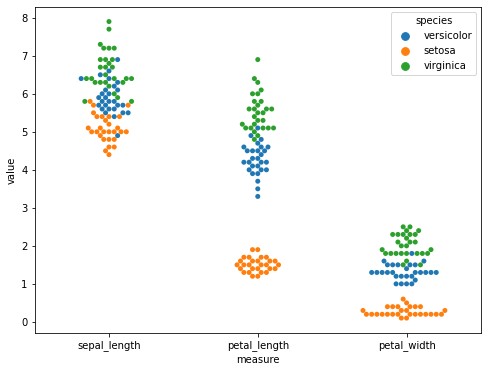

In [61]:
plt.figure(figsize=(8,6))
p = sns.swarmplot(
    x="measure",
    y="value",
    hue="species",
    data=iris_melt,
)
plt.show()

- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [63]:
crosstab = pd.crosstab(iris_train['species'], columns = 'value')
crosstab

col_0,value
species,
setosa,28
versicolor,28
virginica,28


#### 3. Create 4 subplots (2 rows x 2 columns) of scatterplots.
- sepal_length x sepal_width
- petal_length x petal_width
- sepal_area x petal_area
- sepal_length x petal_length

In [64]:
#create new column for sepal area and petal area
iris_train['sepal_area']= iris_train['sepal_length'] * iris_train['sepal_width']
iris_train['petal_area']= iris_train['petal_length'] * iris_train['petal_width']

In [65]:
iris_train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica,sepal_area,petal_area
79,5.7,2.6,3.5,1.0,versicolor,0,1,0,14.82,3.50
36,5.5,3.5,1.3,0.2,setosa,1,0,0,19.25,0.26
133,6.3,2.8,5.1,1.5,virginica,0,0,1,17.64,7.65
95,5.7,3.0,4.2,1.2,versicolor,0,1,0,17.10,5.04
18,5.7,3.8,1.7,0.3,setosa,1,0,0,21.66,0.51


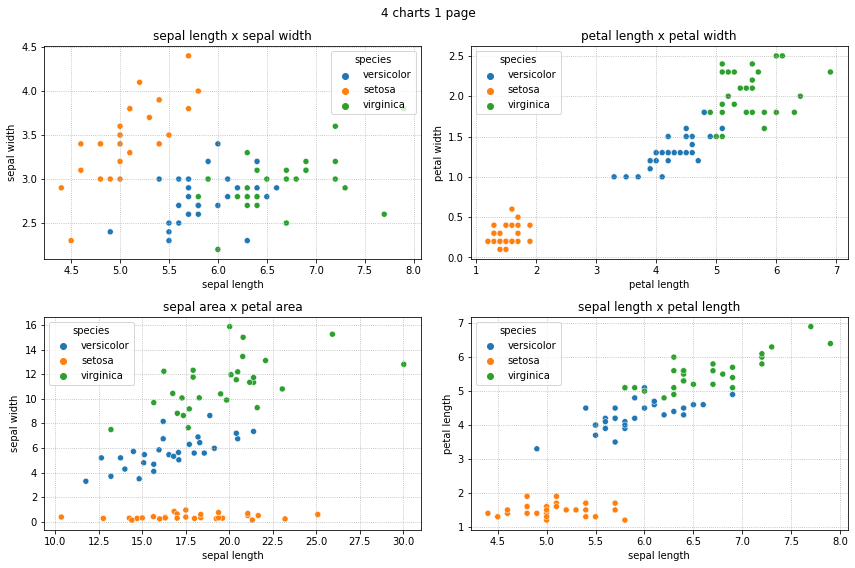

In [66]:
#Answer
fig = plt.figure(figsize = (12, 8))
plt.suptitle('4 charts 1 page')

# x1 = iris_train['sepal_length']
# y1 = iris_train['sepal_width']

# x2 = iris_train['petal_length']
# y2 = iris_train['petal_width']

# x3 = iris_train['sepal_area']
# y3 = iris_train['petal_area']

# x4 = iris_train['sepal_length']
# y4 = iris_train['petal_length']



plt.subplot(2,2,1)
plt.title('sepal length x sepal width')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.grid(True, ls = ':')
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris_train)



plt.subplot(2, 2, 2)
plt.title('petal length x petal width')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.grid(True, ls = ':')
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=iris_train)


plt.subplot(2, 2, 3)
plt.title('sepal area x petal area')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.grid(True, ls = ':')
sns.scatterplot(x='sepal_area', y='petal_area', hue='species', data=iris_train)



plt.subplot(2,2,4)
plt.title('sepal length x petal length')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.grid(True, ls = ':')
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris_train)

plt.subplots_adjust(left=None, 
                 bottom=0.1, 
                right=None, 
                top=None, 
                wspace=None,
                hspace=None)

plt.tight_layout()

plt.show()

#### 4. Create a heatmap of each variable layering correlation coefficient on top.

<AxesSubplot:>

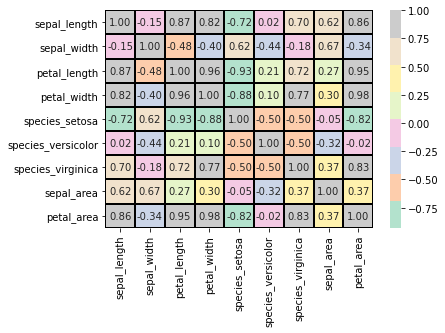

In [67]:
sns.heatmap(iris_train.corr(), cmap= 'Pastel2',  linewidth= 1, linecolor= 'k', annot= True, fmt='.2f')

#### 5. Create a scatter matrix visualizing the interaction of each variable.

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Datas

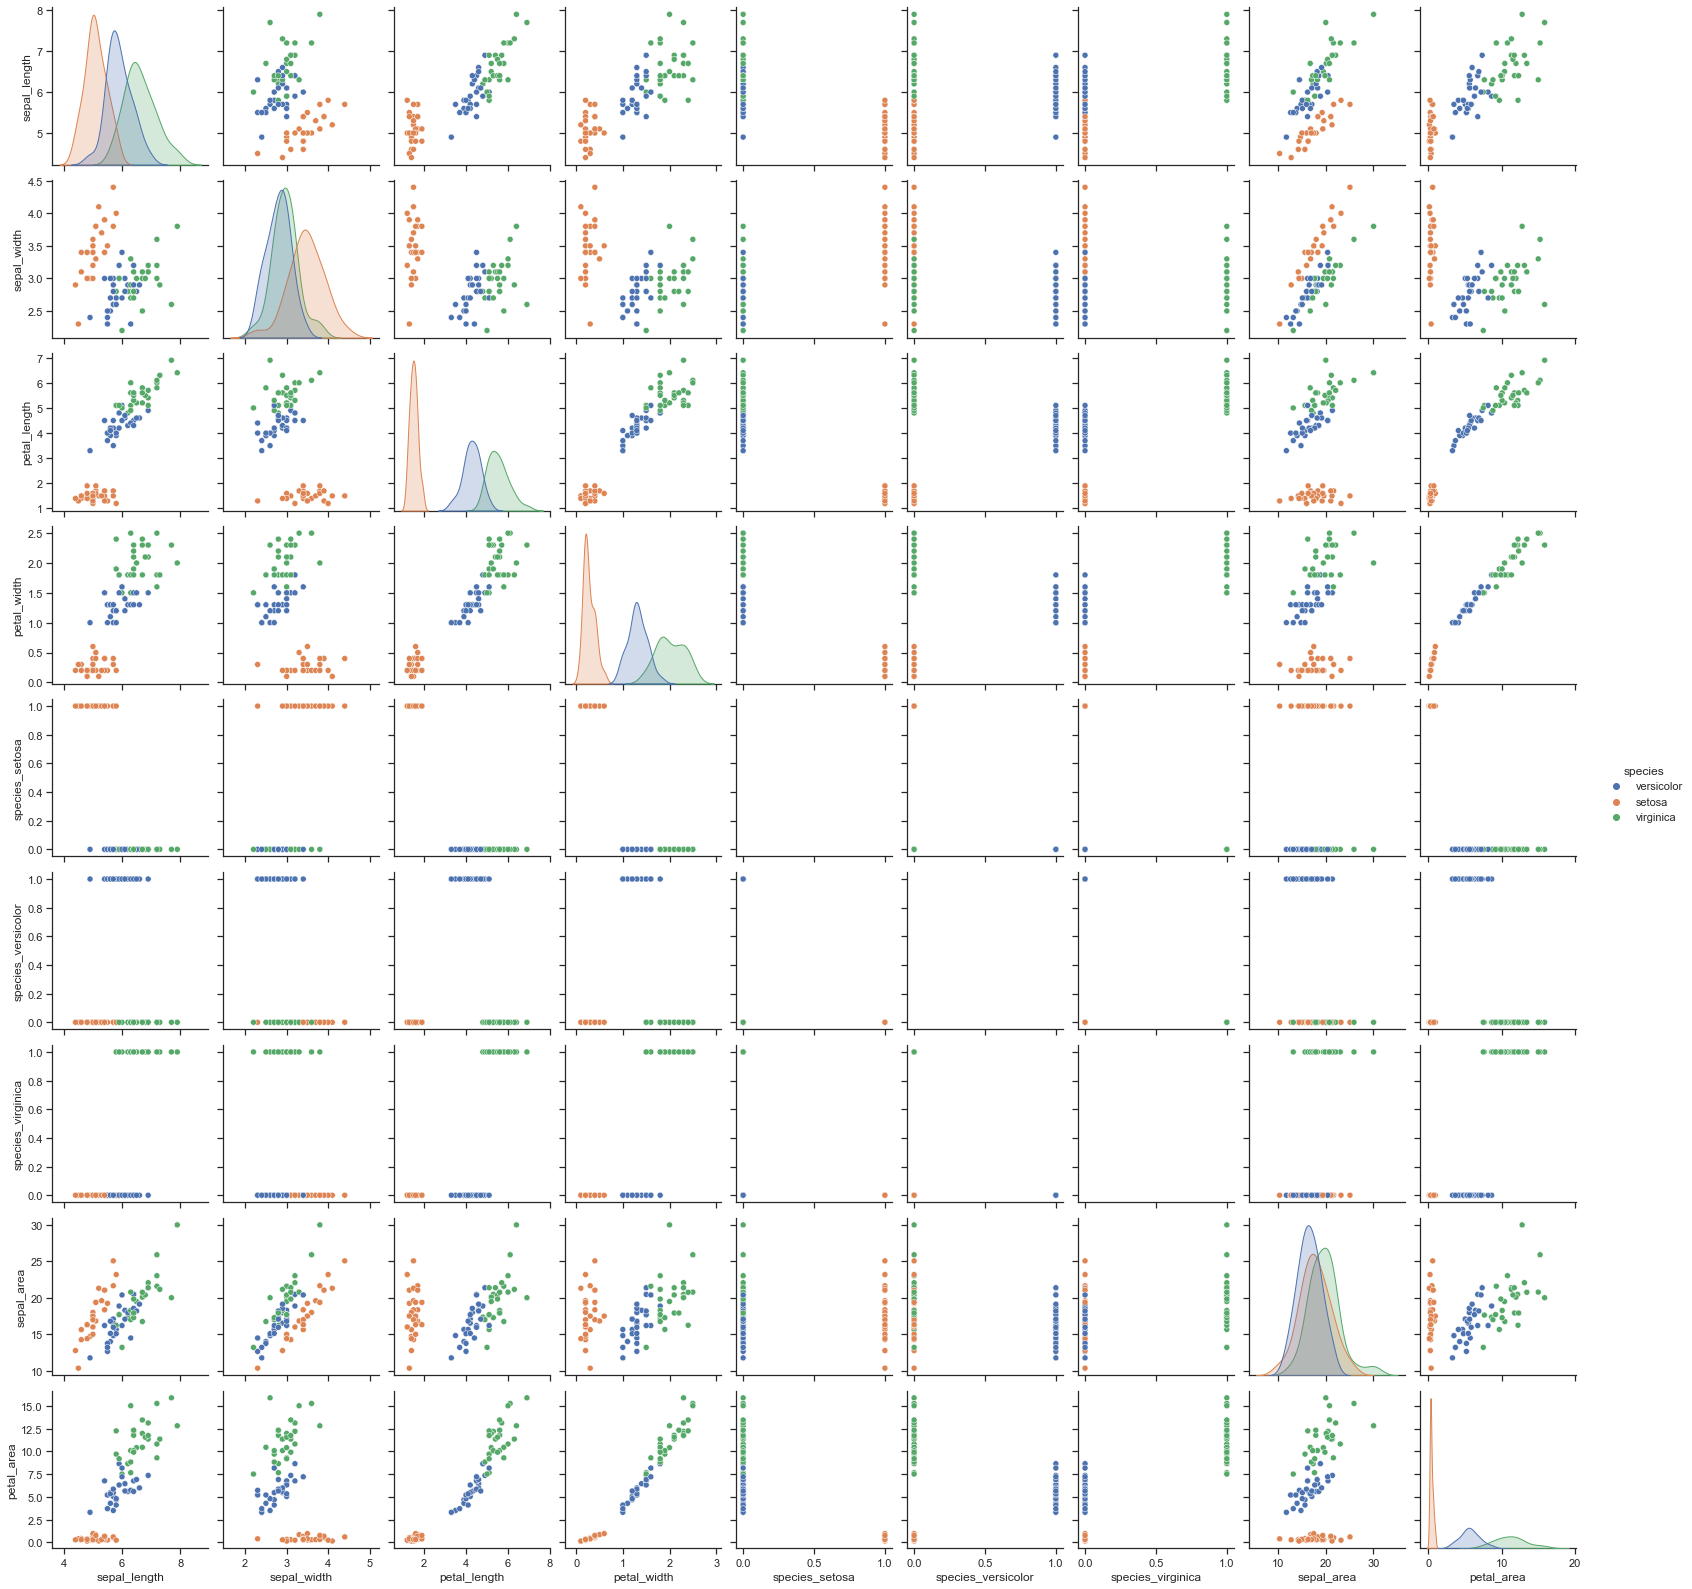

In [68]:
sns.set_theme(style="ticks")

df = iris_train
sns.pairplot(df, hue="species")

#### 6. Is the sepal length significantly different in virginica compared to versicolor? Run a statistical experiment to test this.

- Make sure to include a null hypothesis, alternative hypothesis, results, and summary.

- What is your takeaway from this statistical testing?

In [69]:
x= iris_train[iris_train.species == 'virginica'].sepal_length.dropna()
y= iris_train[iris_train.species == 'versicolor'].sepal_length.dropna()

In [70]:
t,p = stats.ttest_ind(x, y, equal_var= False)

t, p

(5.656491804882077, 6.856736413800083e-07)

In [71]:
alpha= 0.05

if p < alpha:
    print('we reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')


we reject the null hypothesis


####  7.  Create any other visualizations and run any other statistical tests you think will be helpful in exploring this data set.

In [72]:
sa = iris_train['sepal_area'][iris_train['species']!='setosa']
pa = iris_train['petal_area'][iris_train['species']!='setosa']
vs = iris_train['species'][iris_train['species']!='setosa']

In [73]:
sa.head()

79     14.82
133    17.64
95     17.10
139    21.39
115    20.48
Name: sepal_area, dtype: float64

In [75]:
pa.head()

79      3.50
133     7.65
95      5.04
139    11.34
115    12.19
Name: petal_area, dtype: float64

In [76]:
vs.head()

79     versicolor
133     virginica
95     versicolor
139     virginica
115     virginica
Name: species, dtype: object

In [77]:
iris_train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica,sepal_area,petal_area
79,5.7,2.6,3.5,1.0,versicolor,0,1,0,14.82,3.50
36,5.5,3.5,1.3,0.2,setosa,1,0,0,19.25,0.26
133,6.3,2.8,5.1,1.5,virginica,0,0,1,17.64,7.65
95,5.7,3.0,4.2,1.2,versicolor,0,1,0,17.10,5.04
18,5.7,3.8,1.7,0.3,setosa,1,0,0,21.66,0.51


<AxesSubplot:xlabel='species', ylabel='sepal_area'>

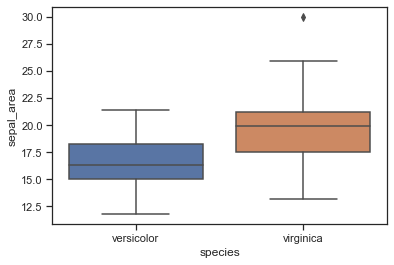

In [78]:
sns.boxplot(x=vs, y=sa)

<AxesSubplot:xlabel='species', ylabel='petal_area'>

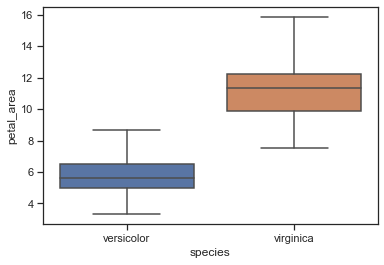

In [79]:
sns.boxplot(x=vs, y=pa)